(lecture12:the-normal)=
# The Normal distribution

The Normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
You must already have seen it when playing with the [Binomial](lecture09:the-binomial-distribution) or the [Poisson](lecture09:the-poisson-distribution).
There are two explanations as to why the Normal appears so often:

+ It is the distribution of maximum uncertainty that matches a known mean and a known variance variance.
This comes from the [principle of maximum entropy](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy), a rather advanced concept that we are not going to deal with.
+ It is the distribution that arises when you sum up a lot of independent random variables together. This result is known as the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

We write:

$$
X \sim N(\mu, \sigma^2),
$$

> $X$ follows a Normal distribution with mean $\mu$ and variance $\sigma^2$.

So, for $\mu=0$ and $\sigma^2=1$, we get the standard Normal.

The PDF is of $X$ is:

$$
p(x) := \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}.
$$

The mean of $X$ is:

$$
\mathbf{E}[X] = \mu,
$$

and the variance is:

$$
\mathbf{V}[X] = \sigma^2.
$$

Of course, the standard deviation of $X$ is just $\sigma$.

Here is how to define a Normal variable in `scipy.stats`:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

In [4]:
mu = 5.0
sigma = 2.0
X = st.norm(loc=mu, scale=sigma)

Here are some samples:

In [5]:
X.rvs(size=10)

array([4.71298088, 2.02774527, 4.15434688, 7.33551347, 7.46140639,
       4.99374955, 7.37227007, 3.90204533, 4.59752625, 1.44135215])

Here is the PDF of $X$:

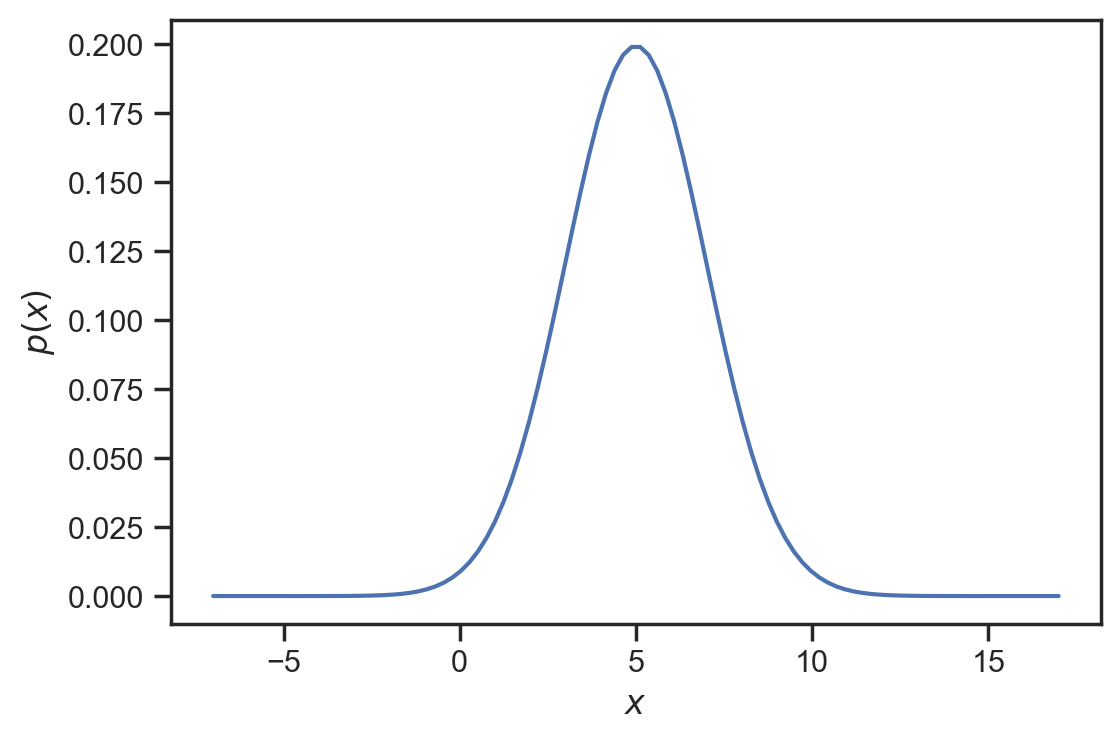

In [6]:
fig, ax = plt.subplots()
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

Notice that this is just a scaled version of of the standard Normal PDF:

$$
p(x) = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right). 
$$

So the PDF of $X$ is the same as the standard Normal but at a different scale.
This is a very useful observation as it allows us to prove the formula for the mean of $X$.
Indeed we have:

$$
\begin{split}
\mathbf{E}[X] &= \int_{-\infty}^{+\infty}x p(x)dx\\
&= \int_{-\infty}^{+\infty}x \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right)dx.
\end{split}
$$

Change integration variable to $z = \frac{x-\mu}{\sigma}$, and you get:

$$
\begin{split}
\mathbf{E}[X] &= \int_{-\infty}^{+\infty}(\mu + \sigma z) \frac{1}{\sigma}\phi\left(z\right)\sigma dz\\
&= \int_{-\infty}^{+\infty}(\mu + \sigma z) \phi\left(z\right)dz\\
&= \mathbf{E}[\mu + \sigma Z]\\
&= \mu + \sigma \mathbf{E}[Z]\\
&= \mu,
\end{split}
$$

since $\mathbf{E}[Z]=0$.
Similarly, you can show that $\mathbf{V}[X] = \sigma^2$.

There is also a connection between the CDF of $X$, call it $F(x) = p(X\le x)$ and the CDF of the standard Normal $\Phi(z)$. It is:

$$
F(x) := p(X \le x) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

We can formally prove this as follows:

$$
\begin{split}
F(x) &= \int_{-\infty}^xp(\tilde{x})d\tilde{x}\\
&= \int_{-\infty}^x \frac{1}{\sigma}\phi\left(\frac{\tilde{x}-\mu}{\sigma}\right) d\tilde{x}.
\end{split}
$$

Now change integration variable to $\tilde{z} = \frac{\tilde{x} - \mu}{\sigma}$.
We have that:

$$
\begin{split}
F(x) &= \int_{-\infty}^{\frac{x-\mu}{\sigma}} \frac{1}{\sigma} \exp\left\{-\frac{\tilde{z}^2}{2}\right\}\sigma d\tilde{z}\\
&= \int_{-\infty}^{\frac{x-\mu}{\sigma}} \phi(\tilde{z})\tilde{z}\\
&= \Phi\left(\frac{x-\mu}{\sigma}\right).
\end{split}
$$

Okay, so if you plot the CDF of $X$ it looks exactly like the CDF of the standard normal at a different scale.
Here it is:

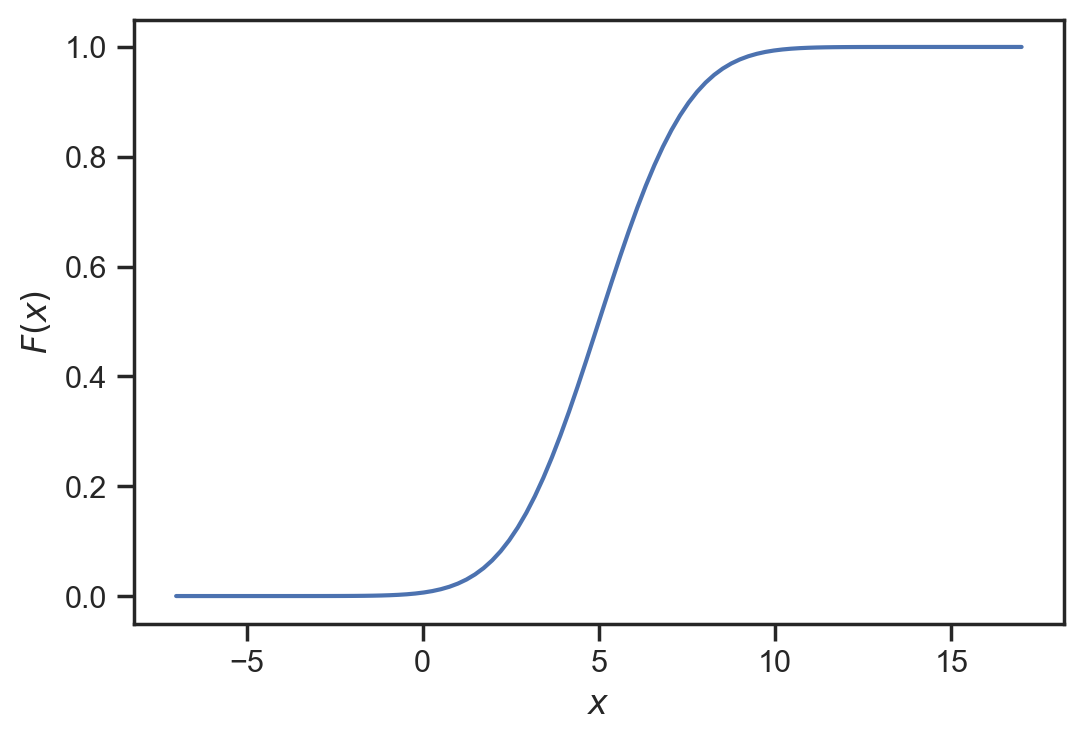

In [8]:
fig, ax = plt.subplots()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$');